# Systems and Transformations

In [1]:
# HIDDEN
from IPython.display import HTML
HTML('''<script>
var code_show_err = false; 
var code_toggle_err = function() {
 var stderrNodes = document.querySelectorAll('[data-mime-type="application/vnd.jupyter.stderr"]')
 var stderr = Array.from(stderrNodes)
 if (code_show_err){
     stderr.forEach(ele => ele.style.display = 'block');
 } else {
     stderr.forEach(ele => ele.style.display = 'none');
 }
 code_show_err = !code_show_err
} 
document.addEventListener('DOMContentLoaded', code_toggle_err);
</script>
To toggle on/off output_stderr, click <a onclick="javascript:code_toggle_err()">here</a>.''')

import warnings
warnings.filterwarnings('ignore')

import sympy as sp
import numpy as np
from lcapy import *

from sympy.abc import t, x, y
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
plt.rcParams['text.usetex'] = True
%matplotlib inline 
         
def mpl_axes_plot(axes, expr, xrange, zero_is_none=False, **kwargs):
    x, start, stop = xrange
    func = sp.lambdify(x, expr)
    x = np.linspace(start, stop, 10000)
    y = func(x)
    axes.tick_params(axis='x', labelsize=8)
    axes.tick_params(axis='y', labelsize=8)
    axes.xaxis.set_major_locator(MaxNLocator(integer=True))
    axes.yaxis.set_major_locator(MaxNLocator(integer=True))
    axes.grid(False)
    axes.margins(0.02, 0.02)
    if zero_is_none:
        y[y==0] = np.nan
    axes.plot(x, y, **kwargs)
    axes.plot(x, np.zeros_like(x), color='k', alpha=0.5)
    return axes
    
def mpl_axes_stem(axes, expr, xrange, zero_is_none=False, **kwargs):
    x, start, stop, step = xrange
    func = sp.lambdify(x, expr, ['numpy', 'sympy'])
    x = np.arange(start, stop, step)
    y = func(x)
    axes.tick_params(axis='x', labelsize=8)
    axes.tick_params(axis='y', labelsize=8)
    axes.xaxis.set_major_locator(MaxNLocator(integer=True))
    axes.yaxis.set_major_locator(MaxNLocator(integer=True))
    axes.grid(False)
    axes.margins(0.02, 0.02)
    axes.plot(x, np.zeros_like(x), color='k', alpha=0.5)
    if zero_is_none:
        y[y==0] = np.nan
    axes.stem(x, y, basefmt=" ", use_line_collection=True, **kwargs)
    return axes
    
def mpl_axes_step(axes, expr, xrange, **kwargs):
    x, start, stop, step = xrange
    func = sp.lambdify(x, expr)
    x = np.arange(start, stop, step)
    y = func(x)
    axes.tick_params(axis='x', labelsize=8)
    axes.tick_params(axis='y', labelsize=8)
    axes.xaxis.set_major_locator(MaxNLocator(integer=True))
    axes.yaxis.set_major_locator(MaxNLocator(integer=True))
    axes.grid(False)
    axes.margins(0.02, 0.02)
    axes.plot(x, np.zeros_like(x), color='k', alpha=0.5)
    return axes.step(x, y, **kwargs)

## What are Systems?

- Systems are the mappings from input signals to output signals. 
- Systems are mathematical models that transform the input signals to the output signals. 
- Systems are mathematical models that transform single input signal to single output signal. 

## Types of Systems

- Continuous-Time (CT) Systems.
- Discrete-Time (CT) Systems.
- Deterministic Systems.
- Probabilistic Systems.

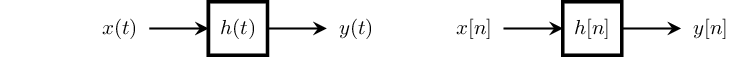

In [2]:
# HIDE/SHOW
Circuit("""
S1 box; l=, right=0.25, aspect=1.1, draw=white
S2 box; l=$x(t)$, right=0.5, aspect=1.1, draw=white
S3 box; l=$h(t)$, right=0.5, aspect=1.1, draw=black
S4 box; l=$y(t)$, right=0.5, aspect=1.1, draw=white
S5 box; l=$x[n]$, right=0.5, aspect=1.1, draw=white
S6 box; l=$h[n]$, right=0.5, aspect=1.1, draw=black
S7 box; l=$y[n]$, right=0.5, aspect=1.1, draw=white
W S1.e S2.w; right=0.5, endarrow=stealth, color=white
W S2.e S3.w; right=0.5, endarrow=stealth, color=black
W S3.e S4.w; right=0.5, endarrow=stealth, color=black
W S4.e S5.w; right=0.5, endarrow=stealth, color=white
W S5.e S6.w; right=0.5, endarrow=stealth, color=black
W S6.e S7.w; right=0.5, endarrow=stealth, color=black
; label_nodes=false, scale=0.5
""").draw()

In [3]:
# HIDE/SHOW

## Rigid (Shape-preserved) Systems

In [4]:
# HIDE/SHOW
f = sp.Piecewise(
    (0, t<-5),                   
    (10, (t>=-5)&(t<0)), 
    (20, (t>=0)&(t<5)), 
    (40-4*t, (t>=5)&(t<10)), 
    (0, t>=10)
).subs(t, t+2)

### Amplitude Scaling

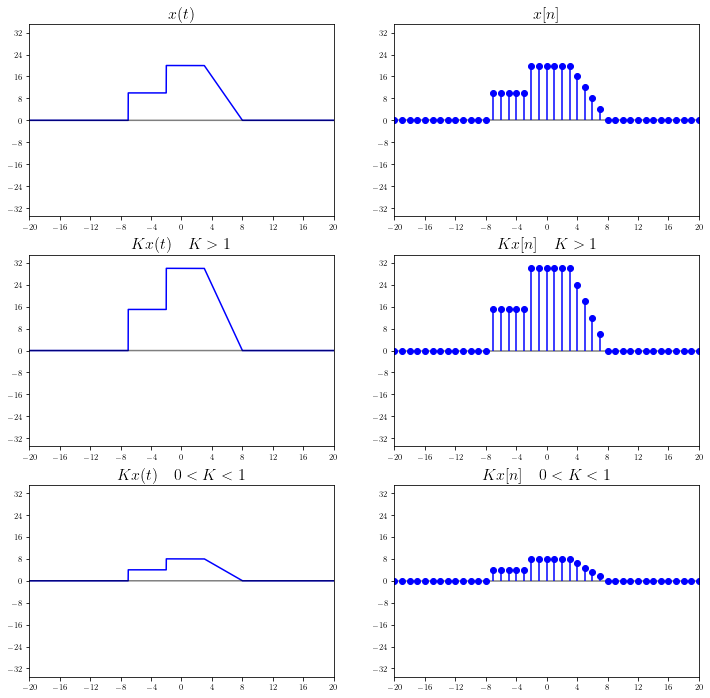

In [5]:
# HIDE/SHOW

fig, ax = plt.subplots(
    3, 2, 
    figsize=(12, 12), 
    # tight_layout=True,
)
    
mpl_axes_plot(ax[0][0], f, (t, -20, 20), color='b')
ax[0][0].set_xlim(-20, 20, 0.2)
ax[0][0].set_ylim(-35, 35, 0.2)
ax[0][0].set_title(r'$x(t)$', fontsize=16)


mpl_axes_stem(ax[0][1], f, (t, -30, 30, 1), linefmt='b', markerfmt='bo')
ax[0][1].set_xlim(-20, 20, 0.2)
ax[0][1].set_ylim(-35, 35, 0.2)
ax[0][1].set_title(r'$x[n]$', fontsize=16)

mpl_axes_plot(ax[1][0], 1.5*f, (t, -20, 20), color='b')
ax[1][0].set_xlim(-20, 20, 0.2)
ax[1][0].set_ylim(-35, 35, 0.2)
ax[1][0].set_title(r'$Kx(t) \quad K>1$', fontsize=16)

mpl_axes_stem(ax[1][1], 1.5*f, (t, -30, 30, 1), linefmt='b', markerfmt='bo')
ax[1][1].set_xlim(-20, 20, 0.2)
ax[1][1].set_ylim(-35, 35, 0.2)
ax[1][1].set_title(r'$Kx[n] \quad K>1$', fontsize=16)

mpl_axes_plot(ax[2][0], 0.4*f, (t, -20, 20), color='b')
ax[2][0].set_xlim(-20, 20, 0.2)
ax[2][0].set_ylim(-35, 35, 0.2)
ax[2][0].set_title(r'$Kx(t) \quad 0<K<1$', fontsize=16)


mpl_axes_stem(ax[2][1], 0.4*f, (t, -30, 30, 1), linefmt='b', markerfmt='bo')
ax[2][1].set_xlim(-20, 20, 0.2)
ax[2][1].set_ylim(-35, 35, 0.2)
ax[2][1].set_title(r'$Kx[n] \quad 0<K<1$', fontsize=16)

plt.show()

### Amplitude Reversal

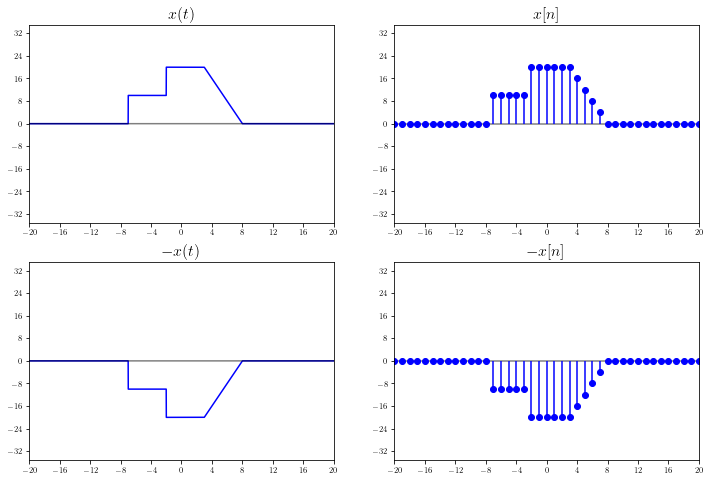

In [6]:
# HIDE/SHOW
fig, ax = plt.subplots(
    2, 2, 
    figsize=(12, 8), 
    # tight_layout=True,
)

a = -1
mpl_axes_plot(ax[0][0], f, (t, -20, 20), color='b')
ax[0][0].set_xlim(-20, 20, 0.2)
ax[0][0].set_ylim(-35, 35, 0.2)
ax[0][0].set_title(r'$x(t)$', fontsize=16)

mpl_axes_stem(ax[0][1], f, (t, -30, 30, 1), linefmt='b', markerfmt='bo')
ax[0][1].set_xlim(-20, 20, 0.2)
ax[0][1].set_ylim(-35, 35, 0.2)
ax[0][1].set_title(r'$x[n]$', fontsize=16)

mpl_axes_plot(ax[1][0], -f, (t, -20, 20), color='b')
ax[1][0].set_xlim(-20, 20, 0.2)
ax[1][0].set_ylim(-35, 35, 0.2)
ax[1][0].set_title(r'$-x(t)$', fontsize=16)

mpl_axes_stem(ax[1][1], -f, (t, -30, 30, 1), linefmt='b', markerfmt='bo')
ax[1][1].set_xlim(-20, 20, 0.2)
ax[1][1].set_ylim(-35, 35, 0.2)
ax[1][1].set_title(r'$-x[n]$', fontsize=16)

plt.show()

### Time Shifting

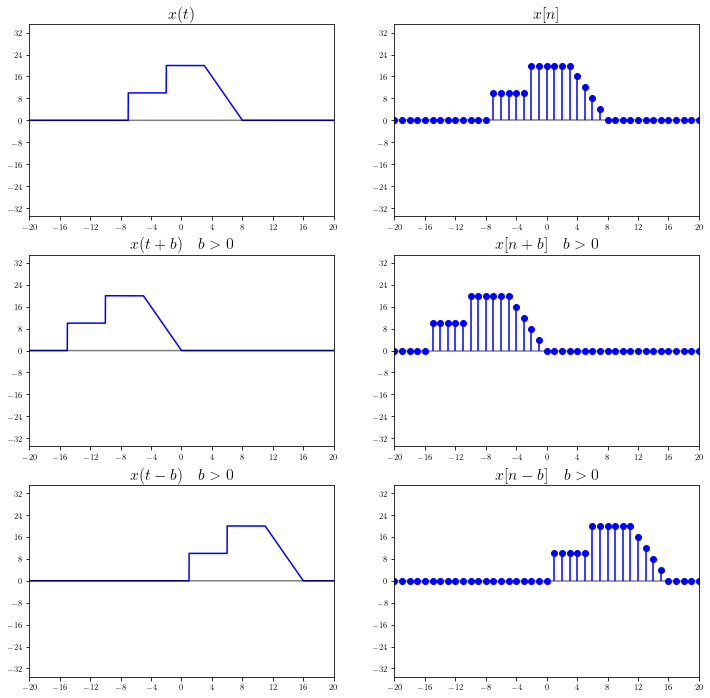

In [7]:
# HIDE/SHOW
fig, ax = plt.subplots(
    3, 2, 
    figsize=(12, 12), 
    # tight_layout=True,
)
    
mpl_axes_plot(ax[0][0], f, (t, -20, 20), color='b')
ax[0][0].set_xlim(-20, 20, 0.2)
ax[0][0].set_ylim(-35, 35, 0.2)
ax[0][0].set_title(r'$x(t)$', fontsize=16)


mpl_axes_stem(ax[0][1], f, (t, -30, 30, 1), linefmt='b', markerfmt='bo')
ax[0][1].set_xlim(-20, 20, 0.2)
ax[0][1].set_ylim(-35, 35, 0.2)
ax[0][1].set_title(r'$x[n]$', fontsize=16)

mpl_axes_plot(ax[1][0], f.subs(t, t+8), (t, -20, 20), color='b')
ax[1][0].set_xlim(-20, 20, 0.2)
ax[1][0].set_ylim(-35, 35, 0.2)
ax[1][0].set_title(r'$x(t+b) \quad b>0$', fontsize=16)

mpl_axes_stem(ax[1][1], f.subs(t, t+8), (t, -30, 30, 1), linefmt='b', markerfmt='bo')
ax[1][1].set_xlim(-20, 20, 0.2)
ax[1][1].set_ylim(-35, 35, 0.2)
ax[1][1].set_title(r'$x[n+b] \quad b>0$', fontsize=16)

mpl_axes_plot(ax[2][0], f.subs(t, t-8), (t, -20, 20), color='b')
ax[2][0].set_xlim(-20, 20, 0.2)
ax[2][0].set_ylim(-35, 35, 0.2)
ax[2][0].set_title(r'$x(t-b) \quad b>0$', fontsize=16)


mpl_axes_stem(ax[2][1], f.subs(t, t-8), (t, -30, 30, 1), linefmt='b', markerfmt='bo')
ax[2][1].set_xlim(-20, 20, 0.2)
ax[2][1].set_ylim(-35, 35, 0.2)
ax[2][1].set_title(r'$x[n-b] \quad b>0$', fontsize=16)

plt.show()

### Time Scaling

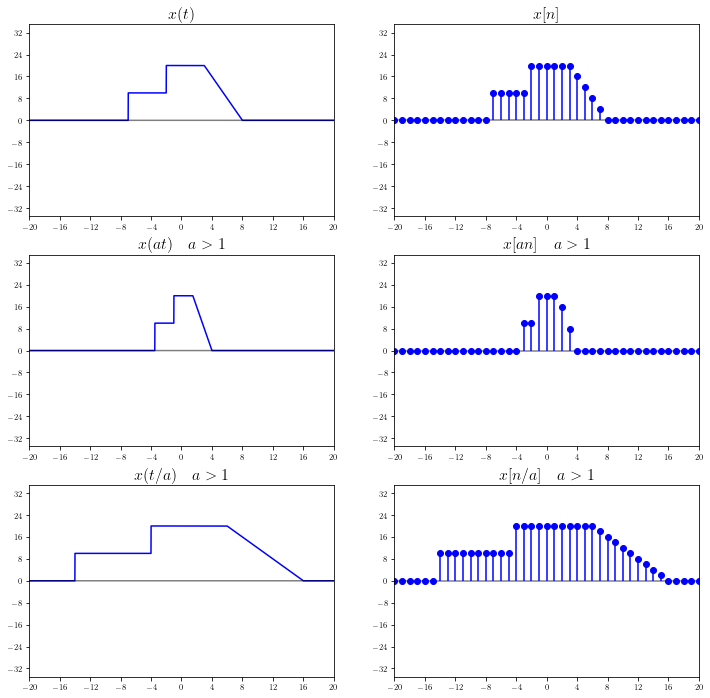

In [8]:
# HIDE/SHOW
fig, ax = plt.subplots(
    3, 2, 
    figsize=(12, 12), 
    # tight_layout=True,
)

a = 2

mpl_axes_plot(ax[0][0], f, (t, -20, 20), color='b')
ax[0][0].set_xlim(-20, 20, 0.2)
ax[0][0].set_ylim(-35, 35, 0.2)
ax[0][0].set_title(r'$x(t)$', fontsize=16)

mpl_axes_stem(ax[0][1], f, (t, -30, 30, 1), linefmt='b', markerfmt='bo')
ax[0][1].set_xlim(-20, 20, 0.2)
ax[0][1].set_ylim(-35, 35, 0.2)
ax[0][1].set_title(r'$x[n]$', fontsize=16)

mpl_axes_plot(ax[1][0], f.subs(t, a*t), (t, -20, 20), color='b')
ax[1][0].set_xlim(-20, 20, 0.2)
ax[1][0].set_ylim(-35, 35, 0.2)
ax[1][0].set_title(r'$x(at) \quad a>1$', fontsize=16)

mpl_axes_stem(ax[1][1], f.subs(t, a*t), (t, -30, 30, 1), linefmt='b', markerfmt='bo')
ax[1][1].set_xlim(-20, 20, 0.2)
ax[1][1].set_ylim(-35, 35, 0.2)
ax[1][1].set_title(r'$x[an] \quad a>1$', fontsize=16)

a = 2
mpl_axes_plot(ax[2][0], f.subs(t, t/a), (t, -20, 20), color='b')
ax[2][0].set_xlim(-20, 20, 0.2)
ax[2][0].set_ylim(-35, 35, 0.2)
ax[2][0].set_title(r'$x(t/a) \quad a>1$', fontsize=16)


mpl_axes_stem(ax[2][1], f.subs(t, t/a), (t, -30, 30, 1), linefmt='b', markerfmt='bo')
ax[2][1].set_xlim(-20, 20, 0.2)
ax[2][1].set_ylim(-35, 35, 0.2)
ax[2][1].set_title(r'$x[n/a] \quad a>1$', fontsize=16)

plt.show()

### Time Reversal 

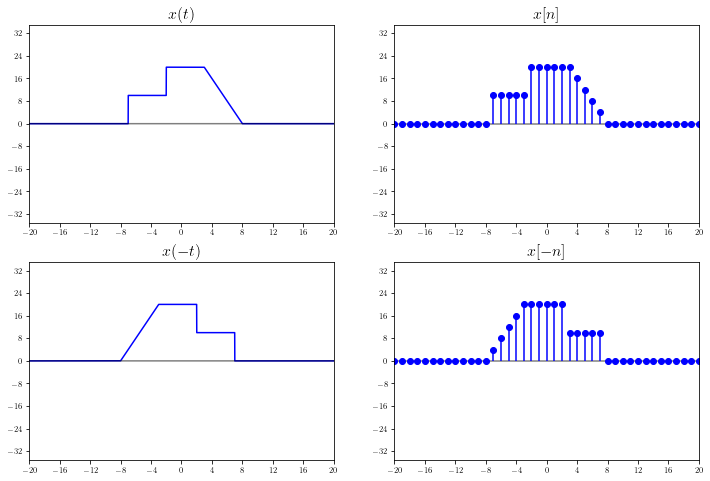

In [9]:
# HIDE/SHOW
fig, ax = plt.subplots(
    2, 2, 
    figsize=(12, 8), 
    # tight_layout=True,
)

a = -1
mpl_axes_plot(ax[0][0], f, (t, -20, 20), color='b')
ax[0][0].set_xlim(-20, 20, 0.2)
ax[0][0].set_ylim(-35, 35, 0.2)
ax[0][0].set_title(r'$x(t)$', fontsize=16)

mpl_axes_stem(ax[0][1], f, (t, -30, 30, 1), linefmt='b', markerfmt='bo')
ax[0][1].set_xlim(-20, 20, 0.2)
ax[0][1].set_ylim(-35, 35, 0.2)
ax[0][1].set_title(r'$x[n]$', fontsize=16)

mpl_axes_plot(ax[1][0], f.subs(t, a*t), (t, -20, 20), color='b')
ax[1][0].set_xlim(-20, 20, 0.2)
ax[1][0].set_ylim(-35, 35, 0.2)
ax[1][0].set_title(r'$x(-t)$', fontsize=16)

mpl_axes_stem(ax[1][1], f.subs(t, a*t), (t, -30, 30, 1), linefmt='b', markerfmt='bo')
ax[1][1].set_xlim(-20, 20, 0.2)
ax[1][1].set_ylim(-35, 35, 0.2)
ax[1][1].set_title(r'$x[-n]$', fontsize=16)

plt.show()

## Rigid Systems on Elementary Signals

In [10]:
# HIDE/SHOW
step = sp.Heaviside(t, 1)
rect = sp.Piecewise(
    (0, sp.Or(sp.StrictLessThan(t, -1/2), sp.StrictGreaterThan(t, 1/2))),
    (1, sp.And(sp.LessThan(t, 1/2), sp.GreaterThan(t, -1/2))),
)
tri = sp.Piecewise(
    (0, sp.Or(sp.StrictLessThan(t, -1), sp.StrictGreaterThan(t, 1))),
    (1+t, sp.And(sp.LessThan(t, 0), sp.GreaterThan(t, -1))),
    (1-t, sp.And(sp.LessThan(t, 1), sp.GreaterThan(t, 0))),  
)
delta = sp.Piecewise(
    (1, sp.Equality(t, 0)),
    (0, sp.Or(sp.StrictLessThan(t, 0), sp.StrictGreaterThan(t, 0))),
)
sinc = sp.sin(sp.pi*t)/(sp.pi*t)
# delta = sp.functions.special.delta_functions.DiracDelta(t)
funcs = [
    step,
    rect,
    tri, 
    sinc.subs(t, t+1e-8), 
    delta
]

### Amplitude Scaling

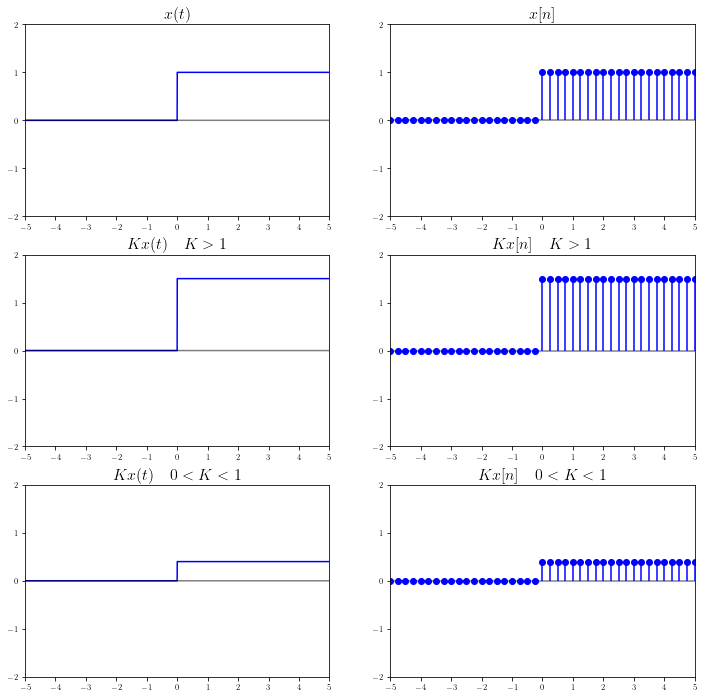

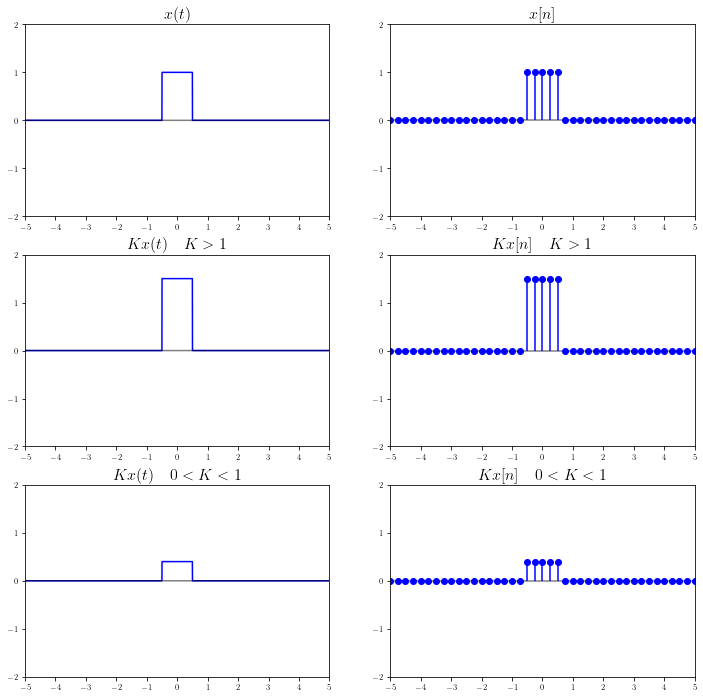

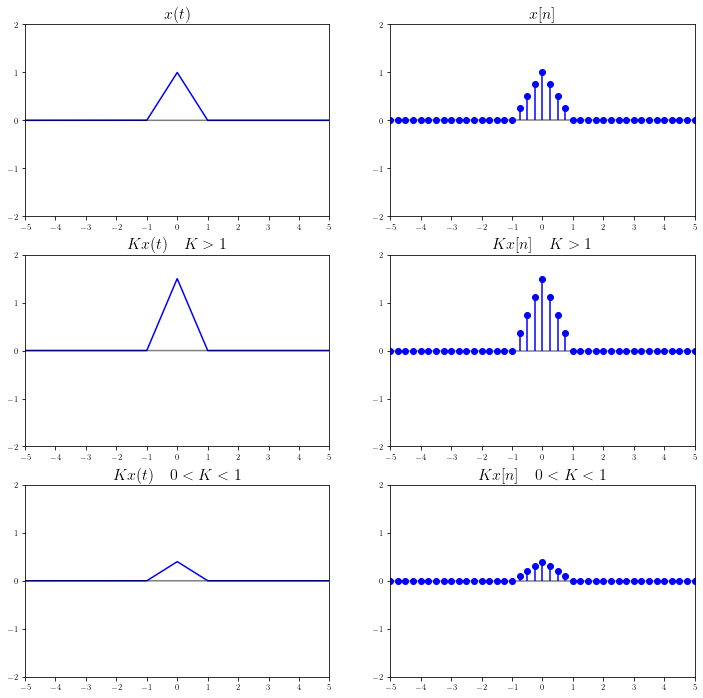

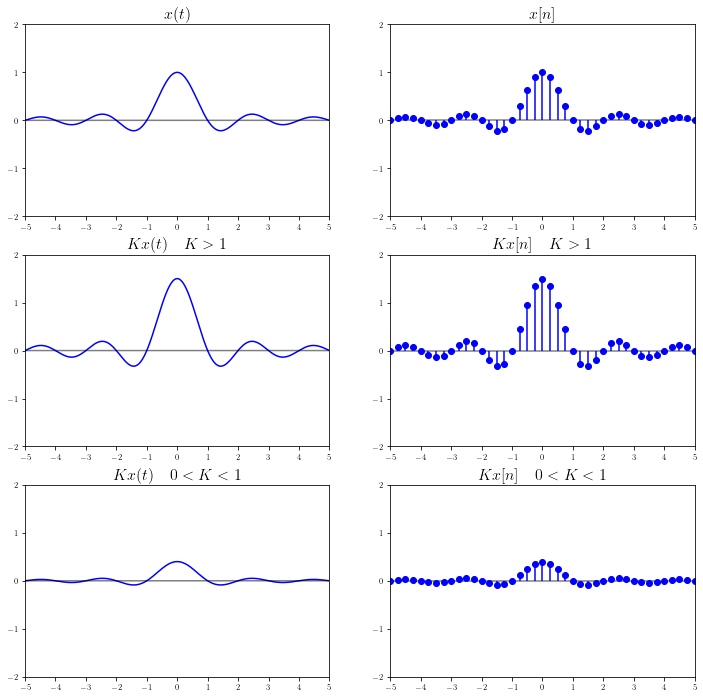

TypeError: cannot unpack non-iterable Zero object

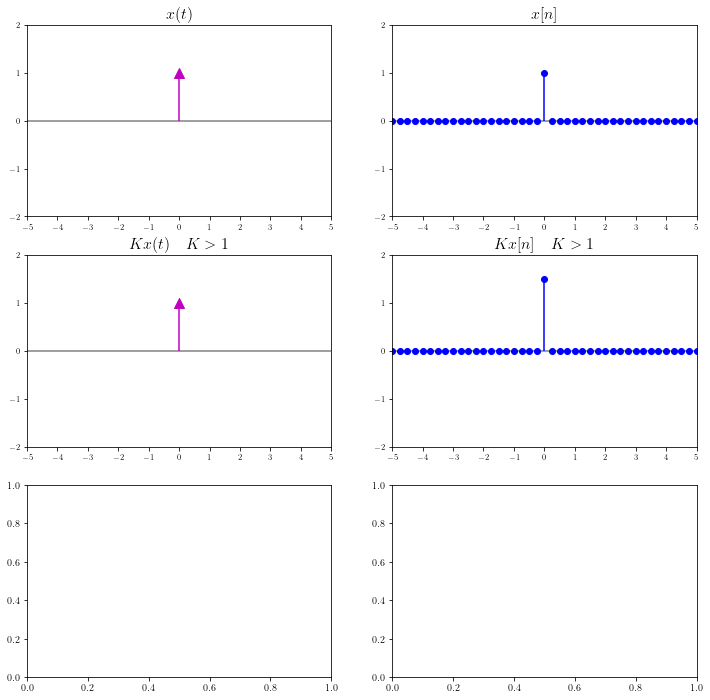

In [11]:
# HIDE/SHOW
for f in funcs[:5]:
    fig, ax = plt.subplots(
        3, 2, 
        figsize=(12, 12), 
        # tight_layout=True,
    )
    if f is not delta:
        mpl_axes_plot(ax[0][0], f, (t, -20, 20), color='b')
    else:
        mpl_axes_stem(ax[0][0], f, (t, -20, 20, 0.25), linefmt='m', markerfmt=' ')
        ax[0][0].scatter(0, 1, color='m', marker='^', s=100)
    ax[0][0].set_xlim(-5, 5, 1)
    ax[0][0].set_ylim(-2, 2, 1)
    ax[0][0].set_title(r'$x(t)$', fontsize=16)

    if f is not delta:
        mpl_axes_stem(ax[0][1], f, (t, -20, 20, 0.25), linefmt='b', markerfmt='bo')
    else:
        mpl_axes_stem(ax[0][1], f, (t, -20, 20, 0.25), linefmt='b', markerfmt='bo')
    ax[0][1].set_xlim(-5, 5, 1)
    ax[0][1].set_ylim(-2, 2, 1)
    ax[0][1].set_title(r'$x[n]$', fontsize=16)

    if f is not delta:
        mpl_axes_plot(ax[1][0], 1.5*f, (t, -20, 20), color='b')
    else:
        mpl_axes_stem(ax[1][0], 1.0*f, (t, -20, 20, 0.25), linefmt='m', markerfmt=' ')
        ax[1][0].scatter(0, 1.0*1, color='m', marker='^', s=100)
    ax[1][0].set_xlim(-5, 5, 1)
    ax[1][0].set_ylim(-2, 2, 1)
    ax[1][0].set_title(r'$Kx(t) \quad K>1$', fontsize=16)

    if f is not delta:
        mpl_axes_stem(ax[1][1], 1.5*f, (t, -20, 20, 0.25), linefmt='b', markerfmt='bo')
    else:
        mpl_axes_stem(ax[1][1], 1.5*f, (t, -20, 20, 0.25), linefmt='b', markerfmt='bo')
    ax[1][1].set_xlim(-5, 5, 1)
    ax[1][1].set_ylim(-2, 2, 1)
    ax[1][1].set_title(r'$Kx[n] \quad K>1$', fontsize=16)

    if f is not delta:
        mpl_axes_plot(ax[2][0], 0.4*f, (t, -20, 20), color='b')
    else:
        mpl_axes_stem(ax[2][0], 1.0*f, (t, -20, 20, 0.25), linefmt='m', markerfmt=' ')
        ax[2][0].scatter(0, 1.0*1, color='m', marker='^', s=100)
    ax[2][0].set_xlim(-5, 5, 1)
    ax[2][0].set_ylim(-2, 2, 1)
    ax[2][0].set_title(r'$Kx(t) \quad 0<K<1$', fontsize=16)

    if f is not delta:
        mpl_axes_stem(ax[2][1], 0.4*f, (t, -20, 20, 0.25), linefmt='b', markerfmt='bo')
    else:
        mpl_axes_stem(ax[2][1], 0.4*f, (t, -20, 20, 0.25), linefmt='b', markerfmt='bo')
    ax[2][1].set_xlim(-5, 5, 1)
    ax[2][1].set_ylim(-2, 2, 1)
    ax[2][1].set_title(r'$Kx[n] \quad 0<K<1$', fontsize=16)

    plt.show()

### Amplitude Reversal

In [ ]:
# HIDE/SHOW
for f in funcs[:5]:
    fig, ax = plt.subplots(
        2, 2, 
        figsize=(12, 8), 
        # tight_layout=True,
    )
    if f is not delta:
        mpl_axes_plot(ax[0][0], f, (t, -20, 20), color='b')
    else:
        mpl_axes_stem(ax[0][0], f, (t, -20, 20, 0.25), linefmt='m', markerfmt=' ')
        ax[0][0].scatter(0, 1, color='m', marker='^', s=100)
    ax[0][0].set_xlim(-5, 5, 1)
    ax[0][0].set_ylim(-2, 2, 1)
    ax[0][0].set_title(r'$x(t)$', fontsize=16)

    
    mpl_axes_stem(ax[0][1], f, (t, -30, 30, 0.25), linefmt='b', markerfmt='bo')
    ax[0][1].set_xlim(-5, 5, 1)
    ax[0][1].set_ylim(-2, 2, 1)
    ax[0][1].set_title(r'$x[n]$', fontsize=16)

    if f is not delta:
        mpl_axes_plot(ax[1][0], -1*f, (t, -20, 20), color='b')
    else:
        mpl_axes_stem(ax[1][0], -1*f, (t, -20, 20, 0.25), linefmt='m', markerfmt=' ')
        ax[1][0].scatter(0, -1*1, color='m', marker='v', s=100)
    ax[1][0].set_xlim(-5, 5, 1)
    ax[1][0].set_ylim(-2, 2, 1)
    ax[1][0].set_title(r'$-x(t)$', fontsize=16)

    mpl_axes_stem(ax[1][1], -1*f, (t, -30, 30, 0.25), linefmt='b', markerfmt='bo')
    ax[1][1].set_xlim(-5, 5, 1)
    ax[1][1].set_ylim(-2, 2, 1)
    ax[1][1].set_title(r'$-x[n]$', fontsize=16)

    plt.show()

### Time Shifting

In [ ]:
# HIDE/SHOW
for f in funcs:
    
    fig, ax = plt.subplots(
        3, 2, 
        figsize=(12, 12), 
        # tight_layout=True,
    )
        
    # mpl_axes_plot(ax[0][0], f, (t, -20, 20), color='b')
    if f is not delta:
        mpl_axes_plot(ax[0][0], f, (t, -20, 20), color='b')
    else:
        mpl_axes_stem(ax[0][0], f, (t, -20, 20, 0.25), linefmt='m', markerfmt=' ')
        ax[0][0].scatter(0, 1, color='m', marker='^', s=100)
    ax[0][0].set_xlim(-5, 5, 0.2)
    ax[0][0].set_ylim(-2, 2, 0.2)
    ax[0][0].set_title(r'$x(t)$', fontsize=16)


    if f is not delta:
        mpl_axes_stem(ax[0][1], f.subs(t, a*t), (t, -20, 20, 0.25), linefmt='b', markerfmt='bo')  
    else:
        mpl_axes_stem(ax[0][1], f.subs(t, a*t), (t, -20, 20, 0.25), linefmt='b', markerfmt='bo')  
    ax[0][1].set_xlim(-5, 5, 0.2)
    ax[0][1].set_ylim(-2, 2, 0.2)
    ax[0][1].set_title(r'$x[n]$', fontsize=16)

    # mpl_axes_plot(ax[1][0], f.subs(t, t+2), (t, -20, 20), color='b')
    if f is not delta:
        mpl_axes_plot(ax[1][0], f.subs(t, t+2), (t, -20, 20), color='b')
    else:
        mpl_axes_stem(ax[1][0], f.subs(t, t+2), (t, -20, 20, 0.25), linefmt='m', markerfmt=' ')
        ax[1][0].scatter(-2, 1, color='m', marker='^', s=100)
    ax[1][0].set_xlim(-5, 5, 0.2)
    ax[1][0].set_ylim(-2, 2, 0.2)
    ax[1][0].set_title(r'$x(t+b) \quad b>0$', fontsize=16)

    if f is not delta:
        mpl_axes_stem(ax[1][1], f.subs(t, t+2), (t, -20, 20, 0.25), linefmt='b', markerfmt='bo')  
    else:
        mpl_axes_stem(ax[1][1], f.subs(t, t+2), (t, -20, 20, 0.25), linefmt='b', markerfmt='bo')  
    ax[1][1].set_xlim(-5, 5, 0.2)
    ax[1][1].set_ylim(-2, 2, 0.2)
    ax[1][1].set_title(r'$x[n+b] \quad b>0$', fontsize=16)

    # mpl_axes_plot(ax[2][0], f.subs(t, t-2), (t, -20, 20), color='b')
    if f is not delta:
        mpl_axes_plot(ax[2][0], f.subs(t, t-2), (t, -20, 20), color='b')
    else:
        mpl_axes_stem(ax[2][0], f.subs(t, t-2), (t, -20, 20, 0.25), linefmt='m', markerfmt=' ')
        ax[2][0].scatter(2, 1, color='m', marker='^', s=100)
    ax[2][0].set_xlim(-5, 5, 0.2)
    ax[2][0].set_ylim(-2, 2, 0.2)
    ax[2][0].set_title(r'$x(t-b) \quad b>0$', fontsize=16)


    if f is not delta:
        mpl_axes_stem(ax[2][1], f.subs(t, t-2), (t, -20, 20, 0.25), linefmt='b', markerfmt='bo')  
    else:
        mpl_axes_stem(ax[2][1], f.subs(t, t-2), (t, -20, 20, 0.25), linefmt='b', markerfmt='bo')  
    ax[2][1].set_xlim(-5, 5, 0.2)
    ax[2][1].set_ylim(-2, 2, 0.2)
    ax[2][1].set_title(r'$x[n-b] \quad b>0$', fontsize=16)

    plt.show()

### Time Scaling

In [ ]:
# HIDE/SHOW
for f in funcs:
    fig, ax = plt.subplots(
        3, 2, 
        figsize=(12, 12), 
        # tight_layout=True,
    )

    a = 2

    # mpl_axes_plot(ax[0][0], f, (t, -20, 20), color='b')
    if f is not delta:
        mpl_axes_plot(ax[0][0], f, (t, -20, 20), color='b')
    else:
        mpl_axes_stem(ax[0][0], f, (t, -20, 20, 0.25), linefmt='m', markerfmt=' ')
        ax[0][0].scatter(0, 1, color='m', marker='^', s=100)
    ax[0][0].set_xlim(-5, 5, 0.2)
    ax[0][0].set_ylim(-2, 2, 0.2)
    ax[0][0].set_title(r'$x(t)$', fontsize=16)

    if f is not delta:
        mpl_axes_stem(ax[0][1], f, (t, -20, 20, 0.25), linefmt='b', markerfmt='bo')
    else:
        mpl_axes_stem(ax[0][1], f, (t, -20, 20, 0.25), linefmt='b', markerfmt='bo')
    ax[0][1].set_xlim(-5, 5, 0.2)
    ax[0][1].set_ylim(-2, 2, 0.2)
    ax[0][1].set_title(r'$x[n]$', fontsize=16)

    # mpl_axes_plot(ax[1][0], f.subs(t, a*t), (t, -5, 5), color='b')
    if f is not delta:
        mpl_axes_plot(ax[1][0], f.subs(t, a*t), (t, -5, 5), color='b')
    else:
        mpl_axes_stem(ax[1][0], f.subs(t, a*t), (t, -20, 20, 0.25), linefmt='m', markerfmt=' ')
        ax[1][0].scatter(0, 1, color='m', marker='^', s=100)
    ax[1][0].set_xlim(-5, 5, 0.2)
    ax[1][0].set_ylim(-2, 2, 0.2)
    ax[1][0].set_title(r'$x(at) \quad a>1$', fontsize=16)

    if f is not delta:
        mpl_axes_stem(ax[1][1], f.subs(t, a*t), (t, -20, 20, 0.25), linefmt='b', markerfmt='bo')
    else:
        mpl_axes_stem(ax[1][1], f.subs(t, a*t), (t, -20, 20, 0.25), linefmt='b', markerfmt='bo')
    ax[1][1].set_xlim(-5, 5, 0.2)
    ax[1][1].set_ylim(-2, 2, 0.2)
    ax[1][1].set_title(r'$x[an] \quad a>1$', fontsize=16)

    a = 2
    # mpl_axes_plot(ax[2][0], f.subs(t, t/a), (t, -5, 5), color='b')    
    if f is not delta:
        mpl_axes_plot(ax[2][0], f.subs(t, t/a), (t, -5, 5), color='b')
    else:
        mpl_axes_stem(ax[2][0], f.subs(t, t/a), (t, -20, 20, 0.25), linefmt='m', markerfmt=' ')
        ax[2][0].scatter(0, 1, color='m', marker='^', s=100)
    ax[2][0].set_xlim(-5, 5, 0.2)
    ax[2][0].set_ylim(-2, 2, 0.2)
    ax[2][0].set_title(r'$x(t/a) \quad a>1$', fontsize=16)

    # mpl_axes_stem(ax[2][1], f.subs(t, t/a), (t, -20, 20, 0.25), linefmt='b', markerfmt='bo')
    if f is not delta:
        mpl_axes_stem(ax[2][1], f.subs(t, a*t), (t, -20, 20, 0.25), linefmt='b', markerfmt='bo')  
    else:
        mpl_axes_stem(ax[2][1], f.subs(t, a*t), (t, -20, 20, 0.25), linefmt='b', markerfmt='bo')  
    ax[2][1].set_xlim(-5, 5, 0.2)
    ax[2][1].set_ylim(-2, 2, 0.2)
    ax[2][1].set_title(r'$x[n/a] \quad a>1$', fontsize=16)

    plt.show()

### Time Reversal

In [ ]:
# HIDE/SHOW
for f in funcs:
    fig, ax = plt.subplots(
        2, 2, 
        figsize=(12, 8), 
        # tight_layout=True,
    )

    a = -1

    # mpl_axes_plot(ax[0][0], f, (t, -20, 20), color='b')
    if f is not delta:
        mpl_axes_plot(ax[0][0], f, (t, -20, 20), color='b')
    else:
        mpl_axes_stem(ax[0][0], f, (t, -20, 20, 0.25), linefmt='m', markerfmt=' ')
        ax[0][0].scatter(0, 1, color='m', marker='^', s=100)
    ax[0][0].set_xlim(-5, 5, 0.2)
    ax[0][0].set_ylim(-2, 2, 0.2)
    ax[0][0].set_title(r'$x(t)$', fontsize=16)

    if f is not delta:
        mpl_axes_stem(ax[0][1], f.subs(t, a*t), (t, -20, 20, 0.25), linefmt='b', markerfmt='bo')  
    else:
        mpl_axes_stem(ax[0][1], f.subs(t, a*t), (t, -20, 20, 0.25), linefmt='b', markerfmt='bo')  
    ax[0][1].set_xlim(-5, 5, 0.2)
    ax[0][1].set_ylim(-2, 2, 0.2)
    ax[0][1].set_title(r'$x[n]$', fontsize=16)

    # mpl_axes_plot(ax[1][0], f.subs(t, a*t), (t, -5, 5), color='b')
    if f is not delta:
        mpl_axes_plot(ax[1][0], f.subs(t, a*t), (t, -5, 5), color='b')
    else:
        mpl_axes_stem(ax[1][0], f.subs(t, a*t), (t, -20, 20, 0.25), linefmt='m', markerfmt=' ')
        ax[1][0].scatter(0, 1, color='m', marker='^', s=100)
    ax[1][0].set_xlim(-5, 5, 0.2)
    ax[1][0].set_ylim(-2, 2, 0.2)
    ax[1][0].set_title(r'$x(-t)$', fontsize=16)
    
    if f is not delta:
        mpl_axes_stem(ax[1][1], f.subs(t, a*t), (t, -20, 20, 0.25), linefmt='b', markerfmt='bo')  
    else:
        mpl_axes_stem(ax[1][1], f.subs(t, a*t), (t, -20, 20, 0.25), linefmt='b', markerfmt='bo')     
    ax[1][1].set_xlim(-5, 5, 0.2)
    ax[1][1].set_ylim(-2, 2, 0.2)
    ax[1][1].set_title(r'$x[-n]$', fontsize=16)

    plt.show()

## Combination Time Ops

### Method 1: Shift, then Scale (Recommended)
- Define $\quad s(t) = x\left(t+b\right) \quad$ --- Add/Subtract to $t$ only, **first**
- Define $\quad y(t) = s\left(at\right) = x\left(at+b\right) \quad$ --- Multiply/Divide to $t$ only, **later**

### Method 2: Scale, then Shift
- Define $\quad s(t) = x\left(at\right)\quad$
- Define $\quad y(t) = s\left(t+\dfrac{b}{a}\right) = x\left(at+b\right) \quad$